In [10]:
######## Create, Train, and Predict Models

# Loads train, test, and val datasets
# Instantiates Models
# Trains Models
# Predicts using Models

Import All Required Modules

In [13]:
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')

# === STEP 0: Imports
from modules.model_manager.trainer.trainer import Trainer
from modules.model_manager.predictor.predictor import Predictor
from modules.model_manager.factories.model_factory import ModelFactory
from modules.model_manager.helpers.configuration_loader import ConfigurationLoader as MMConfigLoader
from modules.model_manager.model_manager import ModelManager
from sklearn.model_selection import KFold
from modules.data_structures.model_dataset import ModelDataset
from model_binaries.utils.binary_utils import save_entity, load_entity, cross_val_train, compute_f1, graph_entity, assess_dataset_balance, evaluate_modelV01_predictions, plot_margin_distributions, swap_team_sides_in_dataset

In [37]:
# === STEP 1: Dependency Instantiations And Global Variable Declarations

## === MODEL MANAGER
yaml_path0 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_000.yaml'
yaml_path1 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_001.yaml'
yaml_path2 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_002.yaml'
yaml_path3 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_003.yaml'
yaml_path4 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_004.yaml'
yaml_path5 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_005.yaml'
yaml_path6 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006.yaml'
yaml_path6_02 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006_02.yaml'
yaml_path6V2 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006V2.yaml'
yaml_path10 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_010.yaml'
yaml_path11 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_011.yaml'
yaml_path12 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_012.yaml'
yaml_path13 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_013.yaml'


yaml_path13333 = 'tune alpha, then add new is home feature, no reg, reduce constraints'


checkpoint = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/models'
trainer = Trainer(checkpoint)
predictor = Predictor()
model_factory = ModelFactory()
mm_configuration_loader = MMConfigLoader()

Load Train Datasets into Memory

In [25]:
# File path to load train, test, and val datasets
train_test_val_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v01/scaler"

In [26]:
train_dataset = load_entity(train_test_val_folder_path, "scaled_train.pkl")
validation_dataset = load_entity(train_test_val_folder_path, "scaled_val.pkl")

In [38]:
randomized_train_dataset = swap_team_sides_in_dataset(train_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=False, swap_probability=.5)
randomized_val_dataset = swap_team_sides_in_dataset(validation_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=False, swap_probability=.5)

Load & Train on predefined trained and val datasets

In [39]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path6_02]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

In [40]:
models = model_manager.create_models(yamls)

In [41]:
model_manager.train(models, [(randomized_train_dataset, randomized_val_dataset)], save_after_training=True)

INFO:root:Training model '69acd12aeda8c675595ad10586c9b4ff' for 30 epochs with batch size 32.


Epoch 1/30
637/637 [==============================] - 23s 30ms/step - loss: 763.6814 - mse: 763.6814 - mae: 17.6660 - val_loss: 202.7376 - val_mse: 202.7376 - val_mae: 11.3837
Epoch 2/30
637/637 [==============================] - 19s 30ms/step - loss: 204.2617 - mse: 204.2617 - mae: 11.3842 - val_loss: 197.9933 - val_mse: 197.9933 - val_mae: 11.2318
Epoch 3/30
637/637 [==============================] - 21s 32ms/step - loss: 190.6893 - mse: 190.6893 - mae: 10.9993 - val_loss: 177.9815 - val_mse: 177.9815 - val_mae: 10.6025
Epoch 4/30
637/637 [==============================] - 20s 32ms/step - loss: 180.2812 - mse: 180.2812 - mae: 10.6658 - val_loss: 220.0085 - val_mse: 220.0085 - val_mae: 11.9489
Epoch 5/30
637/637 [==============================] - 20s 32ms/step - loss: 171.8871 - mse: 171.8871 - mae: 10.4287 - val_loss: 358.1011 - val_mse: 358.1011 - val_mae: 15.7712
Epoch 6/30
637/637 [==============================] - 22s 34ms/step - loss: 167.8401 - mse: 167.8401 - mae: 10.3010 - va

INFO:root:Model '69acd12aeda8c675595ad10586c9b4ff': Finished training.


Model saved successfully at: models/69acd12aeda8c675595ad10586c9b4ff/model_weights_69acd12aeda8c675595ad10586c9b4ff.pth


Assess Performance

In [52]:
predictions = models[0].predict(randomized_val_dataset.examples, return_target_labels=True)

In [53]:
# Get all metrics for trained model on val dataset predictions
metrics = evaluate_modelV01_predictions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")
metrics

{'mse_A': 173.27484,
 'mse_B': 192.94055,
 'mae_A': 10.529236,
 'mae_B': 11.196839,
 'combined_mse': 183.1077,
 'combined_mae': 10.863037,
 'accuracy': 0.4874312647289866,
 'precision': 0.0,
 'recall': 0.0,
 'f1': 0.0,
 'auc': 0.5015854905389187}

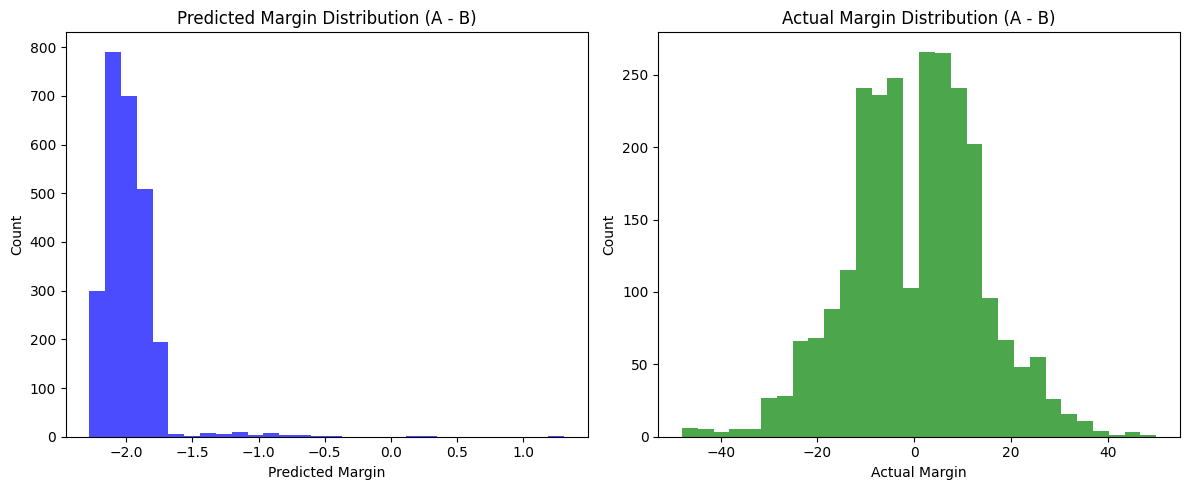

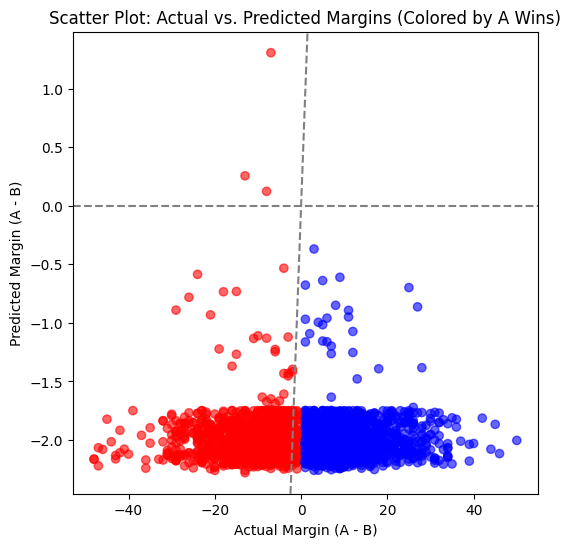

In [54]:
plot_margin_distributions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")

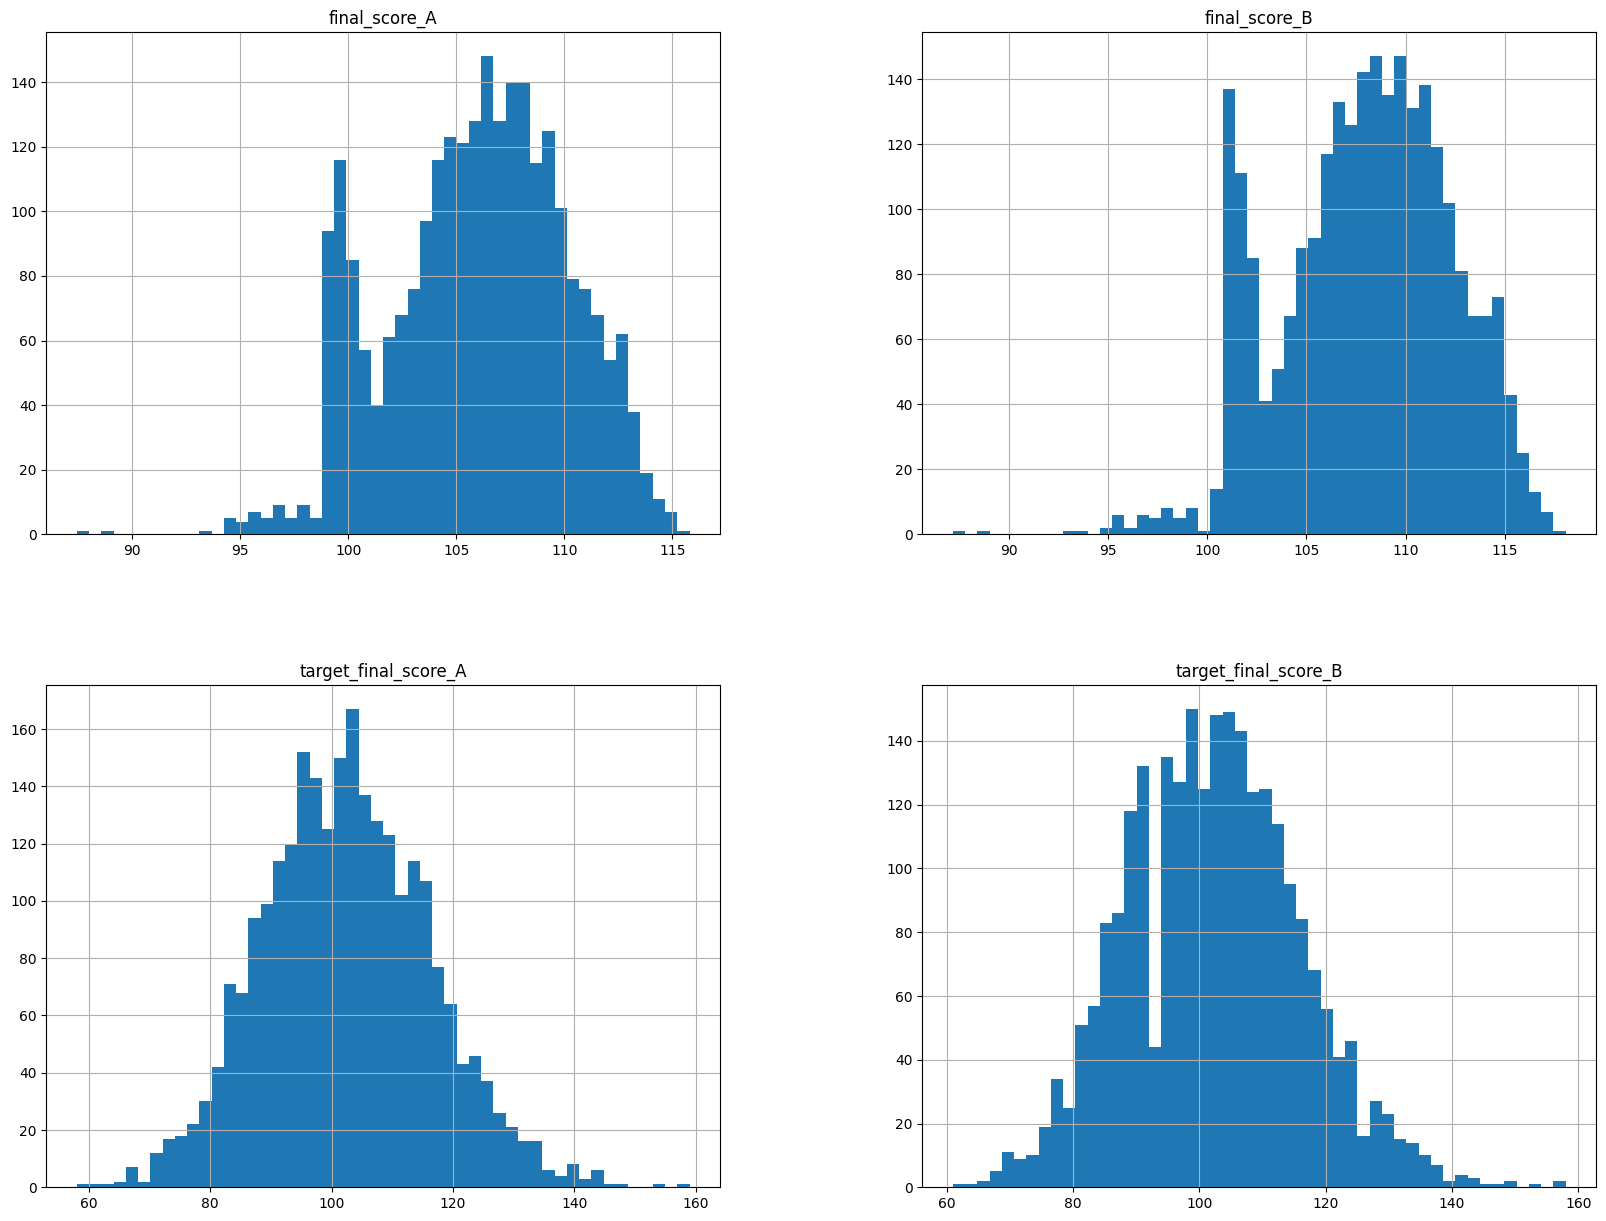

In [55]:
# Graph distribution of predictions against labels 
graph_entity(predictions=predictions,bins=50)

In [56]:
# Print actual predictions against labels
predictions

,final_score_A,final_score_B,target_final_score_A,target_final_score_B
0,110.838768,112.996849,90.0,100.0
1,104.742836,106.692879,113.0,85.0
2,106.151054,108.156349,84.0,92.0
3,108.024155,110.103180,89.0,100.0
4,112.770729,114.975380,113.0,105.0
...,...,...,...,...
2541,102.668602,104.535591,112.0,101.0
2542,107.233589,109.281601,95.0,98.0
2543,99.140083,100.999992,99.0,100.0
2544,103.249306,105.145042,105.0,124.0


Launch Tensorboard

In [ ]:
%tensorboard --logdir=./logs

CROSS VALIDATION ALTERNATIVE

Create and Train Models Using KFold Cross Validation

In [24]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path3]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

Get Averaged Metrics for KFold

In [ ]:
avg_metrics = cross_val_train(model_manager=model_manager, yamls=yamls, train_dataset=train_dataset, n_splits=5)
f1 = compute_f1(avg_metrics["val_precision"], avg_metrics["val_recall"])
print(avg_metrics)
print(f1)